# Natural Language Processing (NLP) 
This is a predictive model which will determine whether a text message is spam or ham Using NLP.I have collected this dataset from kaggle "https://www.kaggle.com/uciml/sms-spam-collection-dataset".


In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
messages=pd.read_csv(r"C:\Users\admin\Desktop\datasets\spam.csv",encoding='cp1252')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
messages.shape

(6776, 5)

In [4]:
messages=messages.iloc[:,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.describe()

,v1,v2
count,6776,6776
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,5854,38


In [6]:
messages.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
length=messages.message.apply(len)
length

0       111
1        29
2       155
3        49
4        61
5       148
6        77
7       160
8       158
9       154
10      109
11      136
12      156
13      196
14       35
15      149
16       26
17       81
18       58
19      156
20       41
21       49
22       53
23       88
24       57
25      144
26       30
27      134
28       75
29       64
       ... 
6746     40
6747     38
6748    154
6749     45
6750     42
6751    160
6752     34
6753     87
6754     43
6755     51
6756     91
6757     27
6758     98
6759    153
6760     63
6761    273
6762     22
6763     66
6764     33
6765     70
6766     96
6767     19
6768     67
6769     12
6770    147
6771    161
6772     37
6773     57
6774    125
6775     26
Name: message, Length: 6776, dtype: int64

In [9]:
len(length)

6776

In [10]:
messages=pd.concat([messages,length],axis=1)

In [11]:
messages.columns.values[2]="Length"     #renaming the 2nd column

In [12]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
from nltk.corpus import stopwords

In [14]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#example to remove punctuation and stop words
abc="i want to remove # & all the...punctuation in this statement!!"
abc_refined=[i for i in abc if i not in string.punctuation]    #for func inside the list=appending inside the list
abc_refined

['i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 's',
 't',
 'a',
 't',
 'e',
 'm',
 'e',
 'n',
 't']

In [17]:
abc_refined="".join(abc_refined)
aa=abc_refined.split()        #word would be seperated
aa

['i',
 'want',
 'to',
 'remove',
 'all',
 'thepunctuation',
 'in',
 'this',
 'statement']

In [18]:
def text_process(mess):
    """
    1.remove the punctuation
    2.remove the stopwords
    3.return the list of clean textwords
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return[word for word in nopunc.split() if word not in stopwords.words("english")]

In [19]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, They, treat, like...
7       [As, per, request, Melle, Melle, Oru, Minnamin...
8       [WINNER, As, valued, network, customer, select...
9       [Had, mobile, 11, months, U, R, entitled, Upda...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, From, 100, 20000, po...
12      [URGENT, You, 1, week, FREE, membership, å£100...
13      [Ive, searching, right, words, thank, breather...
14             [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]
15      [XXXMobileMovieClub, To, use, credit, click, W...
16                                    [Oh, kim, watching]
17      [Eh, u

In [20]:
!pip install wordcloud

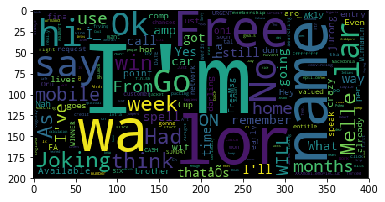

In [21]:
#wordcloud on full document
from wordcloud import WordCloud
cloud=WordCloud().generate(str(messages['message']))
plt.imshow(cloud)

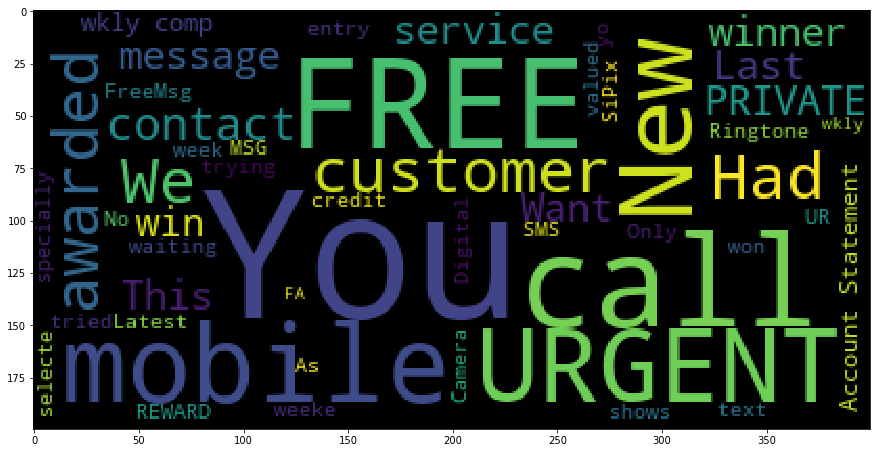

In [22]:
#wordcloud on spam
spam_label=messages[messages.label=="spam"]
wc=WordCloud(max_words=50)
spam_cloud=wc.generate(str(spam_label.message))
plt.figure(figsize=(15,15))
plt.imshow(spam_cloud)

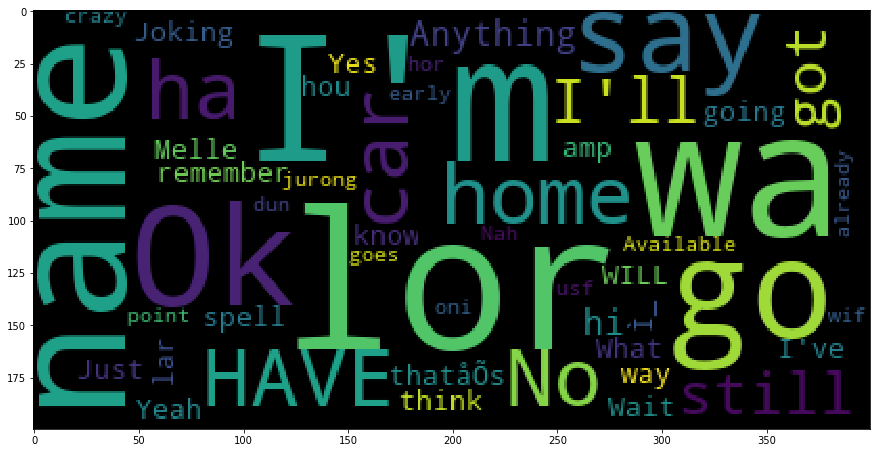

In [23]:
#wordcloud on ham
ham_label=messages[messages.label=="ham"]
wc=WordCloud(max_words=50)
ham_cloud=wc.generate(str(ham_label.message))
fig=plt.figure(figsize=(15,15))
plt.imshow(ham_cloud)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [25]:
bow_transformer.vocabulary_

{'Go': 2078,
 'jurong': 7633,
 'point': 8986,
 'crazy': 5863,
 'Available': 1117,
 'bugis': 5314,
 'n': 8408,
 'great': 7023,
 'world': 11219,
 'la': 7744,
 'e': 6309,
 'buffet': 5313,
 'Cine': 1497,
 'got': 6992,
 'amore': 4754,
 'wat': 11021,
 'Ok': 3122,
 'lar': 7777,
 'Joking': 2489,
 'wif': 11128,
 'u': 10758,
 'oni': 8659,
 'Free': 1959,
 'entry': 6422,
 '2': 421,
 'wkly': 11179,
 'comp': 5713,
 'win': 11140,
 'FA': 1855,
 'Cup': 1565,
 'final': 6648,
 'tkts': 10574,
 '21st': 441,
 'May': 2843,
 '2005': 428,
 'Text': 4015,
 '87121': 858,
 'receive': 9320,
 'questionstd': 9227,
 'txt': 10746,
 'rateTCs': 9268,
 'apply': 4832,
 '08452810075over18s': 72,
 'U': 4140,
 'dun': 6296,
 'say': 9621,
 'early': 6314,
 'hor': 7268,
 'c': 5357,
 'already': 4731,
 'Nah': 2993,
 'I': 2321,
 'dont': 6216,
 'think': 10496,
 'goes': 6963,
 'usf': 10857,
 'lives': 7917,
 'around': 4878,
 'though': 10513,
 'FreeMsg': 1961,
 'Hey': 2249,
 'darling': 5958,
 '3': 534,
 'weeks': 11067,
 'word': 11206,
 

In [26]:
len(bow_transformer.vocabulary_)    #total no. of unique words

11480

In [27]:
messages_bow=bow_transformer.transform(messages.message)      #converting into TDM

In [28]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [29]:
messages_bow.shape    #each unique word has become a column

(6776, 11480)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(messages_bow,messages.label,test_size=0.2,random_state=101)

In [31]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
pred=naive_bayes.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(pred,y_test)
tab

array([[1150,    7],
       [  28,  171]], dtype=int64)

In [34]:
tab.diagonal().sum()/tab.sum()

0.974188790560472

In [35]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
pred1=rfc.predict(x_test)

In [37]:
tab1=confusion_matrix(pred1,y_test)
tab1

array([[1178,   23],
       [   0,  155]], dtype=int64)

In [38]:
tab1.diagonal().sum()/tab1.sum()

0.9830383480825958

# Timer

In [39]:
import timeit

In [40]:
start=timeit.default_timer()
messages['message'].apply(text_process)
stop=timeit.default_timer()
execution_time=stop-start
print("Program executed in these many seconds",execution_time)

Program executed in these many seconds 27.825774199999998
